In [1]:
# import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')


/Users/agpascoemacmini3/opt/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  if sys.path[0] == "":


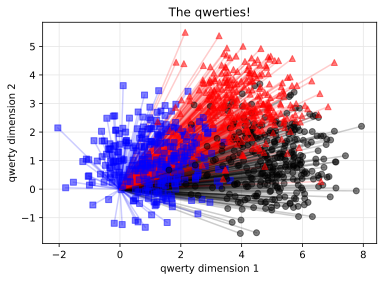

In [4]:
# create data

nPerClust = 300
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]
C = [ 4, 3 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatanate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long() # note: "long" format for CCE

# show the data
fig = plt.figure(figsize=(6,4))
# draw distance to origin
color = 'bkr'
for i in range(len(data)):
  plt.plot([0,data[i,0]],[0,data[i,1]],color=color[labels[i]],alpha=.2)

plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)

plt.grid(color=[.9,.9,.9])
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

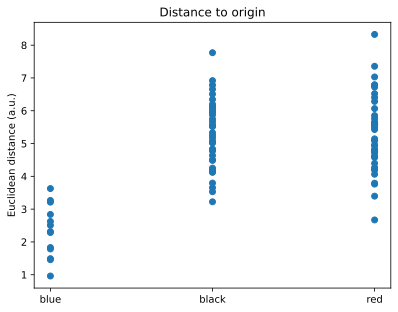

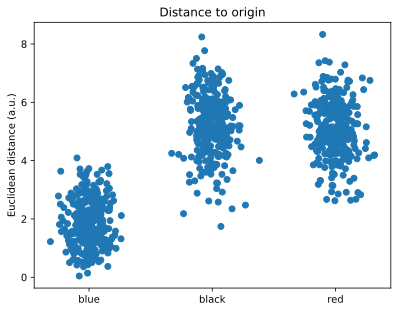

In [5]:
from torch.utils.data.distributed import Sampler
# compute Euclidean distance to the origin
dist2orig = torch.sqrt( data[:,0]**2 + data[:,1]**2 ) #euclidian distance of each point to origin

sample = torch.multinomial(dist2orig,100) #Method1.. sampling to avoid overwritting in the graph
plt.plot(labels[sample.detach()],dist2orig[sample.detach()],'o') #random for displaying reasons only
plt.xticks([0,1,2],labels=['blue','black','red'])
plt.ylabel('Euclidean distance (a.u.)')
plt.title('Distance to origin')
plt.show()

plt.plot(labels+torch.randn(900)/10,dist2orig,'o') #Method2: random for displaying reasons only
plt.xticks([0,1,2],labels=['blue','black','red'])
plt.ylabel('Euclidean distance (a.u.)')
plt.title('Distance to origin')
plt.show()